In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/visit.csv')
df1 = df1[df1['방문자 구분'] == '전체방문자(a+b+c)']
df1 = df1.drop(columns=['방문자 구분'])
df1['지역'] = df1['시'].str.cat(df1['구'], sep=' ')
df1 = df1.drop(columns=['시', '구'])
print(df1)

         기준년월       방문자수           지역
4      202301  8979957.0  강원특별자치도 춘천시
9      202301  9530785.0  강원특별자치도 원주시
14     202301  8031760.0  강원특별자치도 강릉시
19     202301  2946561.0  강원특별자치도 동해시
24     202301  1491579.0  강원특별자치도 태백시
...       ...        ...          ...
10359  202312  1320041.0     충청북도 증평군
10364  202312  2372011.0     충청북도 진천군
10369  202312  1211365.0     충청북도 괴산군
10374  202312  3083478.0     충청북도 음성군
10379  202312  1042746.0     충청북도 단양군

[2076 rows x 3 columns]


In [3]:
df2 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/searches.csv')
print(df2)

       월          시도명   검색건수
0      3     충청북도 괴산군  20229
1      4     충청북도 괴산군  26522
2      6     충청북도 괴산군  34975
3      7     충청북도 괴산군  36455
4      9     충청북도 괴산군  39671
...   ..          ...    ...
2059   1  강원특별자치도 횡성군  55217
2060   2  강원특별자치도 횡성군  60025
2061  10  강원특별자치도 횡성군  96585
2062  11  강원특별자치도 횡성군  57013
2063  12  강원특별자치도 횡성군  57094

[2064 rows x 3 columns]


In [4]:
df1['연도'] = df1['기준년월'] // 100
df1['월'] = df1['기준년월'] % 100
df1 = df1.drop(columns=['기준년월'])

In [5]:
df1['연도-월'] = df1['연도'].astype(str) + '-' + df1['월'].astype(str).str.zfill(2)
df2['연도-월'] = '2023-' + df2['월'].astype(str).str.zfill(2)
print(df1)

            방문자수           지역    연도   월     연도-월
4      8979957.0  강원특별자치도 춘천시  2023   1  2023-01
9      9530785.0  강원특별자치도 원주시  2023   1  2023-01
14     8031760.0  강원특별자치도 강릉시  2023   1  2023-01
19     2946561.0  강원특별자치도 동해시  2023   1  2023-01
24     1491579.0  강원특별자치도 태백시  2023   1  2023-01
...          ...          ...   ...  ..      ...
10359  1320041.0     충청북도 증평군  2023  12  2023-12
10364  2372011.0     충청북도 진천군  2023  12  2023-12
10369  1211365.0     충청북도 괴산군  2023  12  2023-12
10374  3083478.0     충청북도 음성군  2023  12  2023-12
10379  1042746.0     충청북도 단양군  2023  12  2023-12

[2076 rows x 5 columns]


In [6]:
##### [방문자수 - 검색건수] 상관분석 #####

df3 = pd.merge(df1, df2, left_on=['지역', '연도-월'], right_on=['시도명', '연도-월'], how='inner')
df3 = df3.drop(columns=['연도', '시도명'])
df3 = df3[['지역', '연도-월', '방문자수', '검색건수']]
print(df3)

               지역     연도-월       방문자수    검색건수
0     강원특별자치도 춘천시  2023-01  8979957.0  229813
1     강원특별자치도 원주시  2023-01  9530785.0  199254
2     강원특별자치도 강릉시  2023-01  8031760.0  452294
3     강원특별자치도 동해시  2023-01  2946561.0   64643
4     강원특별자치도 태백시  2023-01  1491579.0   32726
...           ...      ...        ...     ...
2035     충청북도 증평군  2023-12  1320041.0   21978
2036     충청북도 진천군  2023-12  2372011.0   49111
2037     충청북도 괴산군  2023-12  1211365.0   16084
2038     충청북도 음성군  2023-12  3083478.0   50880
2039     충청북도 단양군  2023-12  1042746.0   43431

[2040 rows x 4 columns]


In [7]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df3['방문자수'], df3['검색건수'])

print(f"방문자수와 검색건수의 상관계수: {correlation}")
#상관계수 1에 가까울수록 강함.
#강한 양의 상관관계
#검색건수 많아질수록 방문자수 많아짐.

print(f"p-value: {p_value}")
#p-value 0.05보다 작으므로 두 변수의 상관관계는 통계적으로 매우 유의미.

방문자수와 검색건수의 상관계수: 0.7385483893290259
p-value: 0.0


In [8]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 폰트 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

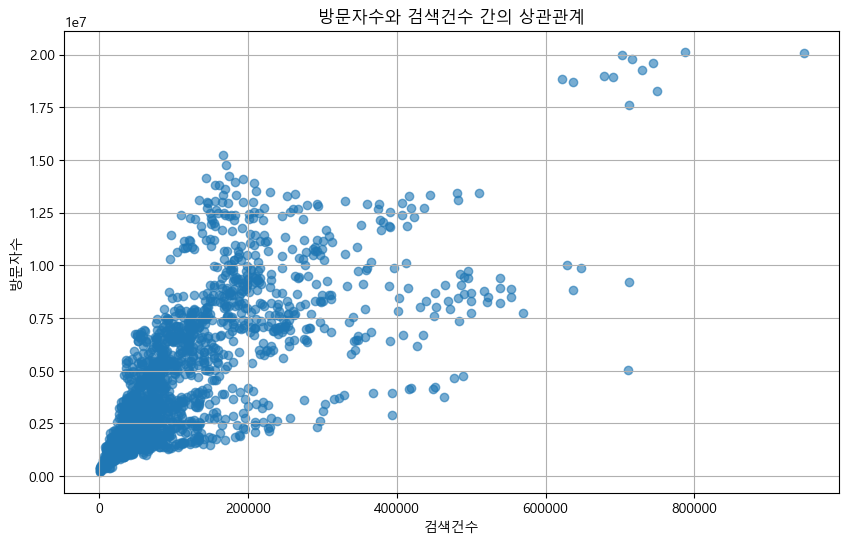

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['검색건수'], df3['방문자수'], alpha=0.6)
plt.title('방문자수와 검색건수 간의 상관관계')
plt.xlabel('검색건수')
plt.ylabel('방문자수')
plt.grid(True)
plt.show()

#점들이 대체로 오른쪽 위로 향하는 경향 -> 양의 상관관계
#대부분 점들이 왼쪽 하단에 분포 -> 많은 데이터 포인트가 상대적으로 낮은 검색건수와 방문자수 가짐.
#검색건수가 증가함에 따라 방문자수의 변동폭이 커지는 경향 -> 검색건수가 많을수록 방문자수의 편차가 커짐.

#그래프의 오른쪽 상단 = 이상치

In [10]:
#이상치 제거 후 다시 상관분석 수행

#이상치 제거 방법 = IQR 방법
Q1_visit = df3['방문자수'].quantile(0.25)
Q3_visit = df3['방문자수'].quantile(0.75)
IQR_visit = Q3_visit - Q1_visit

Q1_search = df3['검색건수'].quantile(0.25)
Q3_search = df3['검색건수'].quantile(0.75)
IQR_search = Q3_search - Q1_search

# 방문자수와 검색건수 모두 IQR 범위 내에 있는 데이터만 선택
filtered_df = df3[
    (df3['방문자수'] >= Q1_visit - 1.5 * IQR_visit) & (df3['방문자수'] <= Q3_visit + 1.5 * IQR_visit) &
    (df3['검색건수'] >= Q1_search - 1.5 * IQR_search) & (df3['검색건수'] <= Q3_search + 1.5 * IQR_search)
]

# 이상치 제거 후 상관분석
correlation, p_value = pearsonr(filtered_df['검색건수'], filtered_df['방문자수'])

print(f"이상치 제거 후 검색건수와 방문자수의 상관계수: {correlation}")
print(f"p-value: {p_value}")


이상치 제거 후 검색건수와 방문자수의 상관계수: 0.7699613657173092
p-value: 0.0


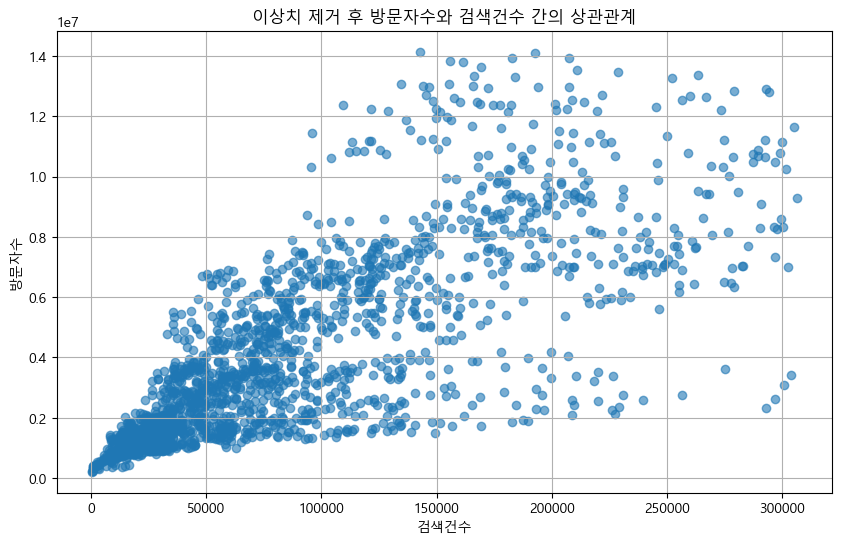

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['검색건수'], filtered_df['방문자수'], alpha=0.6)
plt.title('이상치 제거 후 방문자수와 검색건수 간의 상관관계')
plt.xlabel('검색건수')
plt.ylabel('방문자수')
plt.grid(True)
plt.show()

#이전: 0.7385483893290259
#결과 이전과 비슷하고 이상치만 제거 됨.

In [37]:
##### [방문자수 - 검색순위] 상관분석 #####

df5 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/ranking_edit.csv')
print(df5)
df6 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/summed_visitors.csv')
print(df6)

    Unnamed: 0           지역명  평균 순위
0            0   강원특별자치도 강릉시     91
1            1   강원특별자치도 고성군    184
2            2   강원특별자치도 속초시     94
3            3   강원특별자치도 양양군    146
4            4   강원특별자치도 원주시    158
..         ...           ...    ...
84          84      충청북도 제천시    170
85          85  충청북도 청주시 상당구    115
86          86  충청북도 청주시 청원구     84
87          87  충청북도 청주시 흥덕구     80
88          88      충청북도 충주시    144

[89 rows x 3 columns]
              지자체       방문자수
0     강원특별자치도 강릉시  100420235
1     강원특별자치도 고성군   21565109
2     강원특별자치도 동해시   36371996
3     강원특별자치도 삼척시   28384703
4     강원특별자치도 속초시   50236736
..            ...        ...
168  충청북도 청주시 상당구   66405031
169  충청북도 청주시 서원구   61531896
170  충청북도 청주시 청원구   59982550
171  충청북도 청주시 흥덕구   84803737
172      충청북도 충주시   83985509

[173 rows x 2 columns]


In [39]:
df6.rename(columns={'지자체': '지역명'}, inplace=True)
df7 = pd.merge(df5, df6, on='지역명')
print(df7)

    Unnamed: 0           지역명  평균 순위       방문자수
0            0   강원특별자치도 강릉시     91  100420235
1            1   강원특별자치도 고성군    184   21565109
2            2   강원특별자치도 속초시     94   50236736
3            3   강원특별자치도 양양군    146   26277913
4            4   강원특별자치도 원주시    158  122883497
..         ...           ...    ...        ...
83          84      충청북도 제천시    170   39844107
84          85  충청북도 청주시 상당구    115   66405031
85          86  충청북도 청주시 청원구     84   59982550
86          87  충청북도 청주시 흥덕구     80   84803737
87          88      충청북도 충주시    144   83985509

[88 rows x 4 columns]


In [43]:
correlation, p_value = pearsonr(df7['평균 순위'], df7['방문자수'])

print(f"평균 검색 순위와 방문자수의 상관계수: {correlation}")
print(f"p-value: {p_value}")

평균 검색 순위와 방문자수의 상관계수: -0.3568601743323966
p-value: 0.0006427976435926072


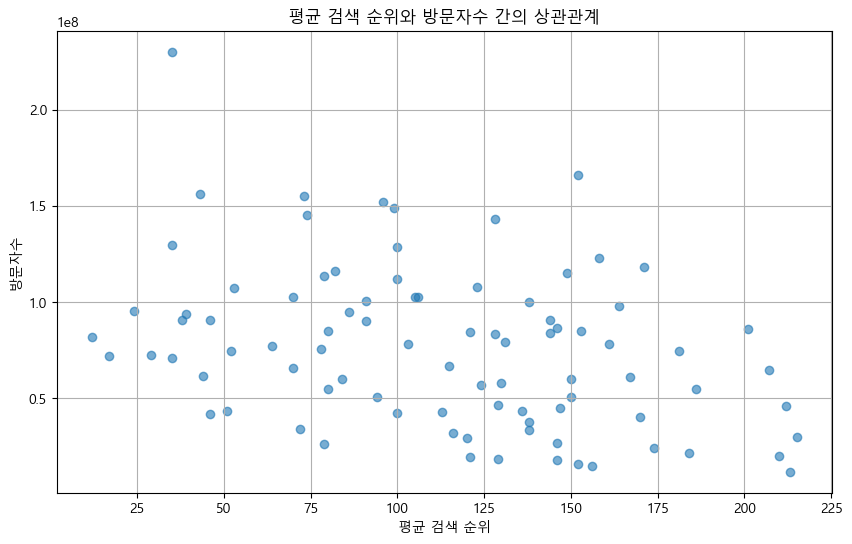

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df7['평균 순위'], df7['방문자수'], alpha=0.6)
plt.title('평균 검색 순위와 방문자수 간의 상관관계')
plt.xlabel('평균 검색 순위')
plt.ylabel('방문자수')
plt.grid(True)
plt.show()

In [46]:
#이상치 제거; IQR 사용

Q1_visit = df7['방문자수'].quantile(0.25)
Q3_visit = df7['방문자수'].quantile(0.75)
IQR_visit = Q3_visit - Q1_visit

Q1_rank = df7['평균 순위'].quantile(0.25)
Q3_rank = df7['평균 순위'].quantile(0.75)
IQR_rank = Q3_rank - Q1_rank

filtered_df7 = df7[
    (df7['방문자수'] >= Q1_visit - 1.5 * IQR_visit) & (df7['방문자수'] <= Q3_visit + 1.5 * IQR_visit) &
    (df7['평균 순위'] >= Q1_rank - 1.5 * IQR_rank) & (df7['평균 순위'] <= Q3_rank + 1.5 * IQR_rank)
]

In [49]:
correlation, p_value = pearsonr(filtered_df7['평균 순위'], filtered_df7['방문자수'])

print(f"이상치 제거 후 평균 검색 순위와 방문자수의 상관계수: {correlation}")
print(f"p-value: {p_value}")

#약한 음의 상관관계
#평균 검색 순위 높을수록(값이 작을수록) 방문자수 많아지는 경향.
#p-value가 0.05보다 작기 때문에 상관계수가 통계적으로 유의미함 의미.

이상치 제거 후 평균 검색 순위와 방문자수의 상관계수: -0.3220034921695454
p-value: 0.0023543972601516917


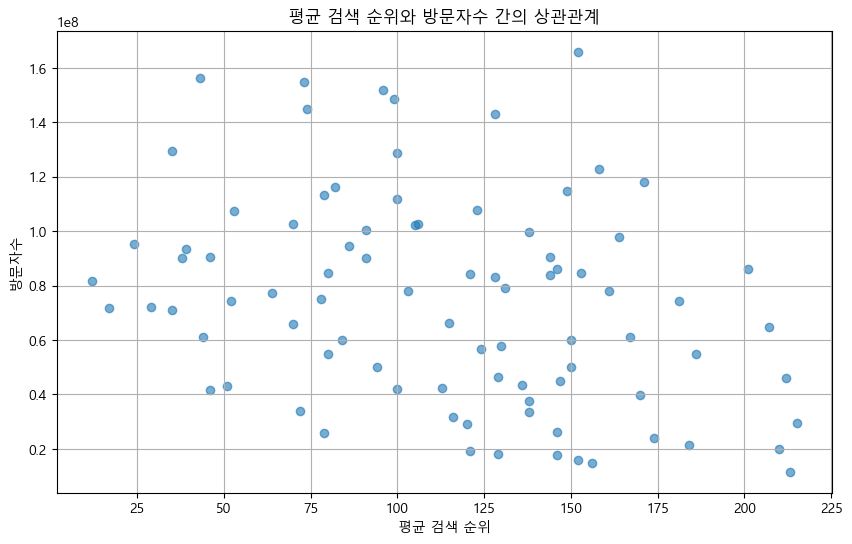

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df7['평균 순위'], filtered_df7['방문자수'], alpha=0.6)
plt.title('평균 검색 순위와 방문자수 간의 상관관계')
plt.xlabel('평균 검색 순위')
plt.ylabel('방문자수')
plt.grid(True)
plt.show()

#이전: -0.3568601743323966
#이상치 제거 후 상관계수가 감소했지만, 여전히 음의 상관관계 나타냄.

In [14]:
##### [방문자수 - sns 언급량] 상관분석 #####

df4 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/sns_mentioned.csv')
df4 = df4.drop(columns=['Unnamed: 0'])
print(df4)
df10 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/summed_visitors.csv')
print(df10)

           검색량(건)           지역명
0    79394.833333   강원특별자치도 강릉시
1    23721.166667   강원특별자치도 고성군
2     5892.416667   강원특별자치도 동해시
3    18495.833333   강원특별자치도 삼척시
4    58979.500000   강원특별자치도 속초시
..            ...           ...
167  23519.500000  충청북도 청주시 상당구
168  14599.083333  충청북도 청주시 서원구
169  15661.083333  충청북도 청주시 청원구
170  20685.000000  충청북도 청주시 흥덕구
171  21436.416667      충청북도 충주시

[172 rows x 2 columns]
              지자체       방문자수
0     강원특별자치도 강릉시  100420235
1     강원특별자치도 고성군   21565109
2     강원특별자치도 동해시   36371996
3     강원특별자치도 삼척시   28384703
4     강원특별자치도 속초시   50236736
..            ...        ...
168  충청북도 청주시 상당구   66405031
169  충청북도 청주시 서원구   61531896
170  충청북도 청주시 청원구   59982550
171  충청북도 청주시 흥덕구   84803737
172      충청북도 충주시   83985509

[173 rows x 2 columns]


In [16]:
df10.rename(columns={'지자체': '지역명'}, inplace=True)
df11 = pd.merge(df4, df10, on='지역명')
print(df11)

           검색량(건)           지역명       방문자수
0    79394.833333   강원특별자치도 강릉시  100420235
1    23721.166667   강원특별자치도 고성군   21565109
2     5892.416667   강원특별자치도 동해시   36371996
3    18495.833333   강원특별자치도 삼척시   28384703
4    58979.500000   강원특별자치도 속초시   50236736
..            ...           ...        ...
164  23519.500000  충청북도 청주시 상당구   66405031
165  14599.083333  충청북도 청주시 서원구   61531896
166  15661.083333  충청북도 청주시 청원구   59982550
167  20685.000000  충청북도 청주시 흥덕구   84803737
168  21436.416667      충청북도 충주시   83985509

[169 rows x 3 columns]


In [17]:
correlation, p_value = pearsonr(df11['검색량(건)'], df11['방문자수'])

print(f"평균 검색 순위와 방문자수의 상관계수: {correlation}")
print(f"p-value: {p_value}")

#p-value > 0.05 이므로 통계적으로 유의미 X

평균 검색 순위와 방문자수의 상관계수: 0.7038444531025007
p-value: 1.3683112328549083e-26


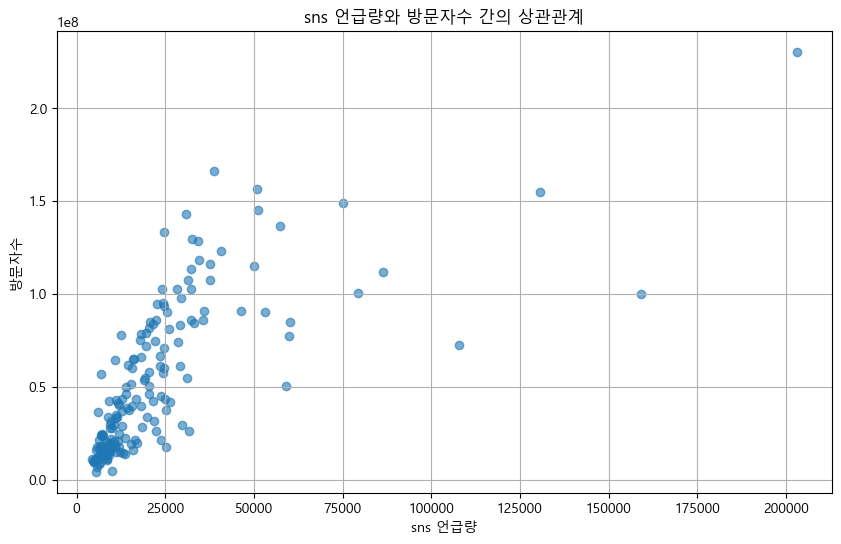

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df11['검색량(건)'], df11['방문자수'], alpha=0.6)
plt.title('sns 언급량와 방문자수 간의 상관관계')
plt.xlabel('sns 언급량')
plt.ylabel('방문자수')
plt.grid(True)
plt.show()

In [19]:
#이상치 제거; IQR 사용

Q1_visit = df11['방문자수'].quantile(0.25)
Q3_visit = df11['방문자수'].quantile(0.75)
IQR_visit = Q3_visit - Q1_visit

Q1_rank = df11['검색량(건)'].quantile(0.25)
Q3_rank = df11['검색량(건)'].quantile(0.75)
IQR_rank = Q3_rank - Q1_rank

filtered_df11 = df11[
    (df11['방문자수'] >= Q1_visit - 1.5 * IQR_visit) & (df11['방문자수'] <= Q3_visit + 1.5 * IQR_visit) &
    (df11['검색량(건)'] >= Q1_rank - 1.5 * IQR_rank) & (df11['검색량(건)'] <= Q3_rank + 1.5 * IQR_rank)
]

In [20]:
correlation, p_value = pearsonr(filtered_df11['검색량(건)'], filtered_df11['방문자수'])

print(f"이상치 제거 후 sns 언급량과 방문자수의 상관계수: {correlation}")
print(f"p-value: {p_value}")

#이상치 제거해도 여전히 p-value 값이 0.05 이상이므로, 통계적으로 유의미 X

이상치 제거 후 평균 검색 순위와 방문자수의 상관계수: 0.8139861484063997
p-value: 1.0961889601132102e-37


In [21]:
##### [방문자수 - 지역관심도] 상관분석 #####

df8 = pd.read_csv('C:/Users/LG/Desktop/Junior/1학기/통계데이터 분석 공모전/interest.csv')
print(df8)
print(df10)

        응답자ID    조사시작일자 성별구분코드 연령대구분명 답변자거주지역명        가구소득정도명 부산광역시여행관심값  \
0    53350972  20231225      F    50대    인천광역시            NaN   예전과 비슷하다   
1    53354280  20231225      F    50대    광주광역시            NaN     약간 커졌다   
2    53366842  20231225      F    50대    광주광역시  500이상700만원 미만   예전과 비슷하다   
3    53345371  20231225      F    50대     충청북도  300이상500만원 미만     많이 커졌다   
4    53331902  20231225      F    50대     충청북도       700만원 이상     많이 커졌다   
..        ...       ...    ...    ...      ...            ...        ...   
248  53375494  20231225      F    30대     경상남도            NaN    많이 적어졌다   
249  53376177  20231225      M    40대    대구광역시       300만원 미만     약간 커졌다   
250  53376514  20231225      M    50대    서울특별시       700만원 이상     약간 커졌다   
251  53377132  20231225      F    60대    서울특별시  500이상700만원 미만   예전과 비슷하다   
252  53377410  20231225      F    50대    서울특별시  500이상700만원 미만     약간 커졌다   

    충청남도대전광역시여행관심값 충청북도여행관심값 경상남도울산광역시여행관심값 경상북도대구광역시여행관심값 전라남도광주광역시여행관심값  \
0         

In [22]:
from sklearn.preprocessing import LabelEncoder

for column in df8.columns:
    if '여행관심값' in column:
        le = LabelEncoder()
        df8[column + '_인코딩'] = le.fit_transform(df8[column])
print(df8)

#이렇게 두 변수가 숫자형, 범주형일 때, 인코딩해서 분산 분석(ANOVA)하는 방법도 있긴한데..
#이건 지역 두개가 합쳐져 있는 게 있어서 좀 분석이 어려울 듯..?

        응답자ID    조사시작일자 성별구분코드 연령대구분명 답변자거주지역명        가구소득정도명 부산광역시여행관심값  \
0    53350972  20231225      F    50대    인천광역시            NaN   예전과 비슷하다   
1    53354280  20231225      F    50대    광주광역시            NaN     약간 커졌다   
2    53366842  20231225      F    50대    광주광역시  500이상700만원 미만   예전과 비슷하다   
3    53345371  20231225      F    50대     충청북도  300이상500만원 미만     많이 커졌다   
4    53331902  20231225      F    50대     충청북도       700만원 이상     많이 커졌다   
..        ...       ...    ...    ...      ...            ...        ...   
248  53375494  20231225      F    30대     경상남도            NaN    많이 적어졌다   
249  53376177  20231225      M    40대    대구광역시       300만원 미만     약간 커졌다   
250  53376514  20231225      M    50대    서울특별시       700만원 이상     약간 커졌다   
251  53377132  20231225      F    60대    서울특별시  500이상700만원 미만   예전과 비슷하다   
252  53377410  20231225      F    50대    서울특별시  500이상700만원 미만     약간 커졌다   

    충청남도대전광역시여행관심값 충청북도여행관심값 경상남도울산광역시여행관심값  ...   제주여행관심값 부산광역시여행관심값_인코딩  \
0         